{'ZZ11': 0.8138570119501768, '111Z': 0.5014932710251228, '11Z1': 0.7390166769689706, '1Z11': 0.3597204709195997, 'Z111': 0.8699539052034254, 'Z1Z1': 0.052798162911802615, '1ZZ1': 0.7805269767893748, 'Z11Z': 0.09756031533678511, '1Z1Z': 0.5011249154483027, '11ZZ': 0.10801712734079794, 'XXYY': 0.11431581024394488, 'YXXY': 0.9332711486788646, 'XYYX': 0.51036725367883, 'YYXX': 0.33476083612200525}
all list:  [['ZZ11', 'Z11Z', '11ZZ', 'Z1Z1', '1ZZ1', '1Z1Z', '11Z1', 'Z111', '1Z11', '111Z'], ['ZZ11', 'Z11Z', '11ZZ', 'Z1Z1', '1ZZ1', '1Z1Z', 'YYXX', 'XYYX', 'YXXY', 'XXYY']]
max element:  ['ZZ11', 'Z11Z', '11ZZ', 'Z1Z1', '1ZZ1', '1Z1Z', '11Z1', 'Z111', '1Z11', '111Z']
all list:  [['XYYX', 'YXXY', 'XXYY', 'YYXX']]
max element:  ['XYYX', 'YXXY', 'XXYY', 'YYXX']
all list:  [['ZZ11', 'Z11Z', '11Z1', '11ZZ', 'Z1Z1', 'Z111', '1ZZ1', '1Z1Z', '1Z11', '111Z'], ['YYXX'], ['XXYY'], ['XYYX'], ['YXXY']]
max element:  ['ZZ11', 'Z11Z', '11Z1', '11ZZ', 'Z1Z1', 'Z111', '1ZZ1', '1Z1Z', '1Z11', '111Z']
all list: 

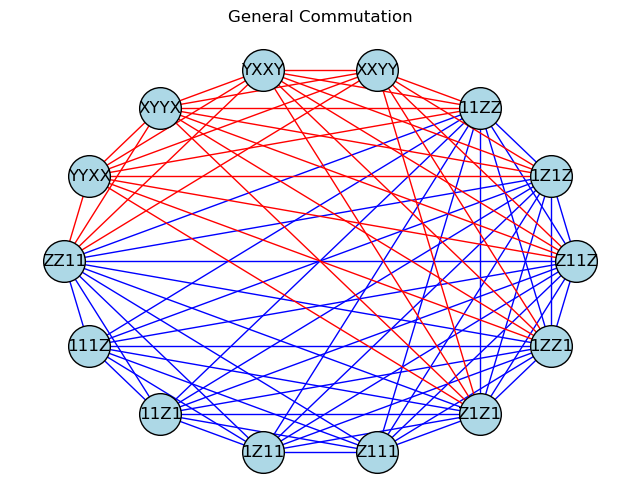

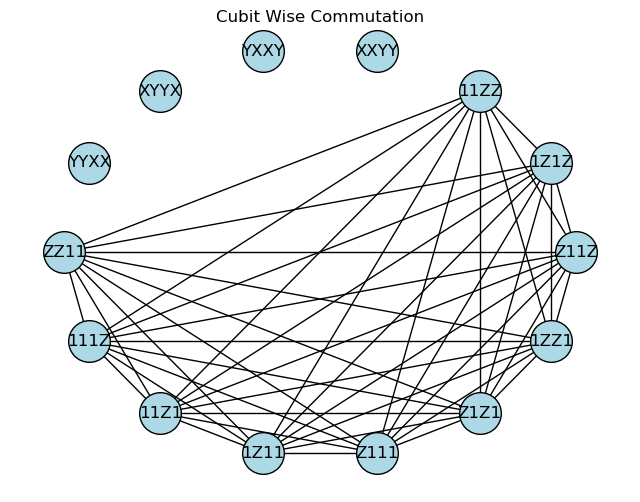

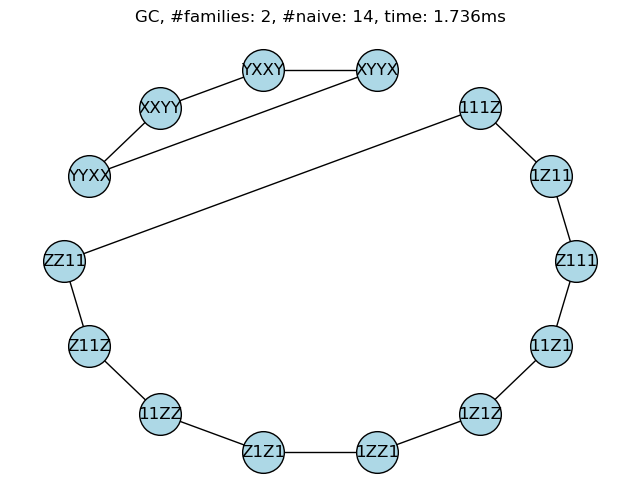

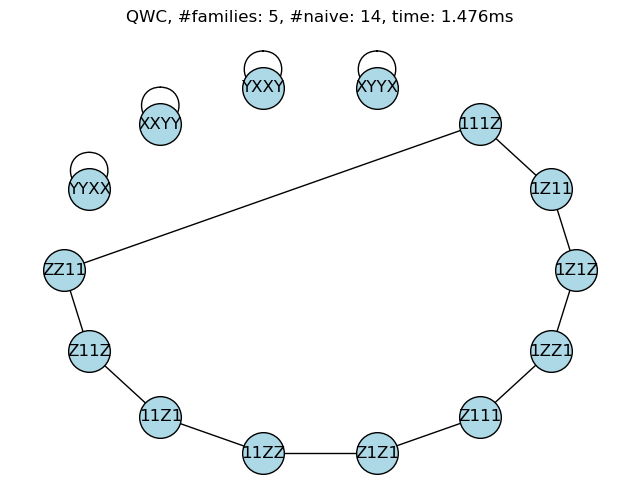

NameError: name 'FindOrderedCliques' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
from MethodsUpdate import *

# create a copy of the list of Paulistrings
# Paulistrings is a list of Strings, which contain 'X', 'Z', 'Y' and '1'

# list of Paulistrings
# PauliStrings = ['X1ZY', 'X1XX', 'XYYZ', 'ZZZZ', '1111', 'XXXX', 'YYYY']

# example for all possible two qubit pauli strings (16):
# PauliStrings = ['XX', 'YY', 'ZZ', '11', 'X1', 'XY', 'XZ', 'Y1', 'YX', 'YZ', 'Z1', 'ZX', 'ZY', '1X', '1Y', '1Z']
 
# example from paper 
PauliStrings = ['ZZ11', '111Z', '11Z1', '1Z11', 'Z111', 'Z1Z1', '1ZZ1', 'Z11Z', '1Z1Z', '11ZZ', 'XXYY', 'YXXY', 'XYYX', 'YYXX']

# cofficients of Pauli strings in Hamiltonian
import random 
weightsList = [random.random() for i in range(len(PauliStrings))]

weights = {}

# create weights dictionary 
for i in range(len(weightsList)): 
    weights[PauliStrings[i]] = weightsList[i]



def Main():

    check = check_Paulistring(PauliStrings)

    if not check:
        return False 


    Graph_QWC = create_Graph_QWC(PauliStrings)
    Graph_GC, edge_colors_GC = create_Graph_GC(PauliStrings)


    # to keep track of time, to compare runtimes for different algorithms to each other, first calculate number of families for GC
    start = time.time()
    result_GC = find_max_clique(Graph_GC, [])
    end = time.time()
    time_GC_ms = np.round(1000*(end-start), 3)

    # check if all elements in the cliques are linearly independent
    if not checkLinearIndependency(result_GC): 
        return False

    # then, calculate number of families for QWC
    start = time.time()
    result_QWC = find_max_clique(Graph_QWC, [])
    end = time.time()
    time_QWC_ms = np.round(1000*(end-start), 3)

    # again, for QWC check if the pauli strings in the respective cliques are linearly independent
    if not checkLinearIndependency(result_QWC): 
        return False

    draw_Graph(Graph_GC, 'General Commutation', edge_colors_GC)
    draw_Graph(Graph_QWC, 'Cubit Wise Commutation', [])

    draw_new_Graph(result_GC, 'GC, #families: ' + str(len(result_GC)) + ', #naive: ' + str(len(PauliStrings)) + ', time: ' + str(time_GC_ms) + 'ms')
    draw_new_Graph(result_QWC, 'QWC, #families: ' + str(len(result_QWC)) + ', #naive: ' + str(len(PauliStrings)) + ', time: ' + str(time_QWC_ms) + 'ms')

    orderedCliquesGC = FindOrderedCliques(result_GC, weights)
    orderedCliquesQWC = FindOrderedCliques(result_QWC, weights)

if __name__ == Main():  
    Main()

'''
Further ideas: 

comparing sets of Pauli strings of different lengths to each other, depending on the element the Hamiltonian stems from. 
The number of Pauli strings will increase with the complexity of the molecule. 

And the computation time will increase as well. 

The idea is, comparing the computation time of estimating the ground state energy for the three methods: Naive, QWC and GC.

Also, one could compare the times it takes to partition the Paulistrings into commuting families with the two different methods, GC and QWC. 
'''
